In [138]:
import h5py 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

def synca_phase_model1(radial_position, roll=0, n=60):
    #radial position in mm
    wavelength = 3e8 / 25.86e9
    r_array = 0.1
    theta_array = np.arange(0, n, 1) * 2 * np.pi / n
    x_array = r_array * np.cos(theta_array)
    y_array = r_array * np.sin(theta_array)

    d = np.sqrt((x_array - radial_position*0.001) ** 2 + y_array ** 2)
    arctan = np.arctan2(y_array, radial_position*0.001-x_array)
    #arctan = np.arange(0, 120, 1)*2*np.pi/120
    #print(arctan)
    spatial = 2*np.pi * d/wavelength
    phase = np.unwrap(np.roll(spatial-arctan, roll))
    phase -= phase[0]
    
    return phase

def synca_phase_model2(radial_position, roll=0, n=60,):
    #radial position in mm
    wavelength = 3e8 / 25.86e9
    r_array = 0.1
    theta_array = np.arange(0, n, 1) * 2 * np.pi / n
    x_array = r_array * np.cos(-theta_array)
    y_array = r_array * np.sin(-theta_array)

    d = np.sqrt((x_array - radial_position*0.001) ** 2 + y_array ** 2)
    arctan = np.arctan2(-y_array, radial_position*0.001-x_array)
    #arctan = np.arange(0, 120, 1)*2*np.pi/120
    #print(arctan)
    spatial = 2*np.pi * d/wavelength
    phase = np.unwrap(np.roll(spatial+arctan, roll))
    phase -= phase[0]
    
    return phase


def synca_phase_model3(radial_position, roll=0, n=60, invert=False):
    #radial position in mm
    wavelength = 3e8 / 25.86e9
    r_array = 0.1
    theta_array = np.arange(0, n, 1) * 2 * np.pi / n
    x_array = r_array * np.cos(theta_array)
    y_array = r_array * np.sin(theta_array)

    d = np.sqrt((x_array - radial_position*0.001) ** 2 + y_array ** 2)
    arctan = np.arctan2(y_array, radial_position*0.001-x_array)
    #arctan = np.arange(0, 120, 1)*2*np.pi/120
    #print(arctan)
    spatial = 2*np.pi * d/wavelength
    if invert:
        phase = np.roll(spatial, -roll) - arctan
    else:
        phase = np.roll(spatial, roll) + arctan
    phase -= phase[0]
    
    return phase


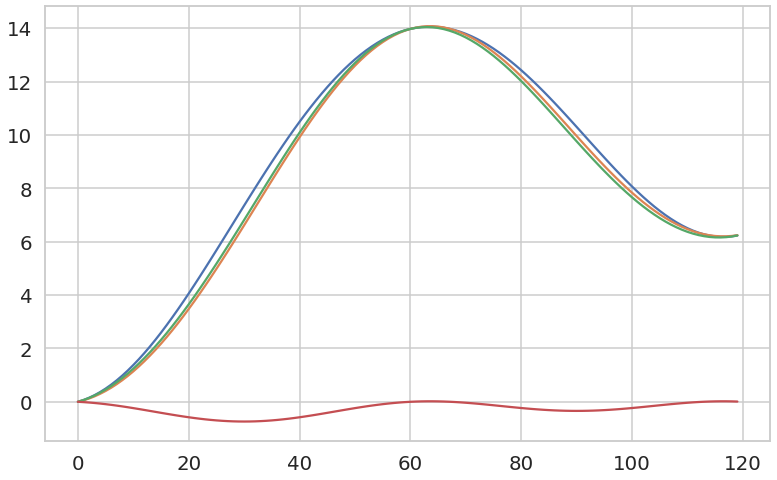

In [145]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

r = 10
n=120
ax.plot(synca_phase_model1(r, roll=0, n=n))
ax.plot(-synca_phase_model2(r, roll=60, n=n,))
ax.plot(-synca_phase_model3(r, roll=60, n=n))

ax.plot(-synca_phase_model2(r, roll=60, n=n, )-synca_phase_model1(r, roll=0, n=n))

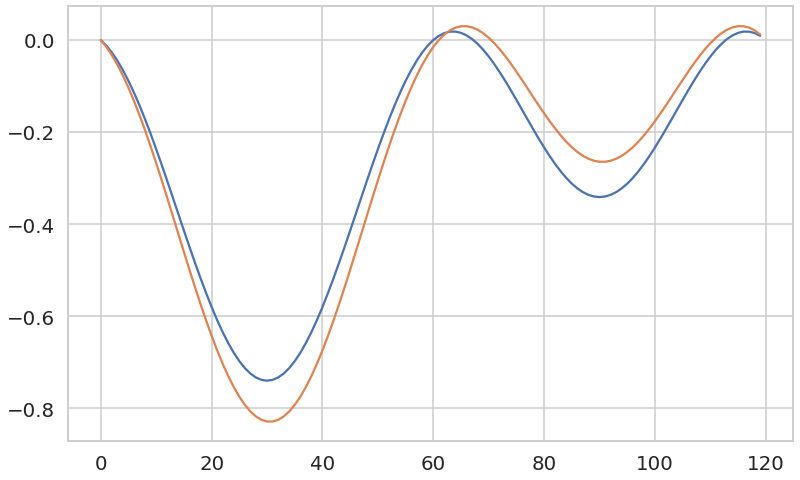

In [154]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

r = 10
n=120
ax.plot(-synca_phase_model1(r, roll=0, n=n) -synca_phase_model2(r, roll=60, n=n,))
ax.plot(-synca_phase_model1(r, roll=0, n=n) -synca_phase_model3(r, roll=61, n=n,))

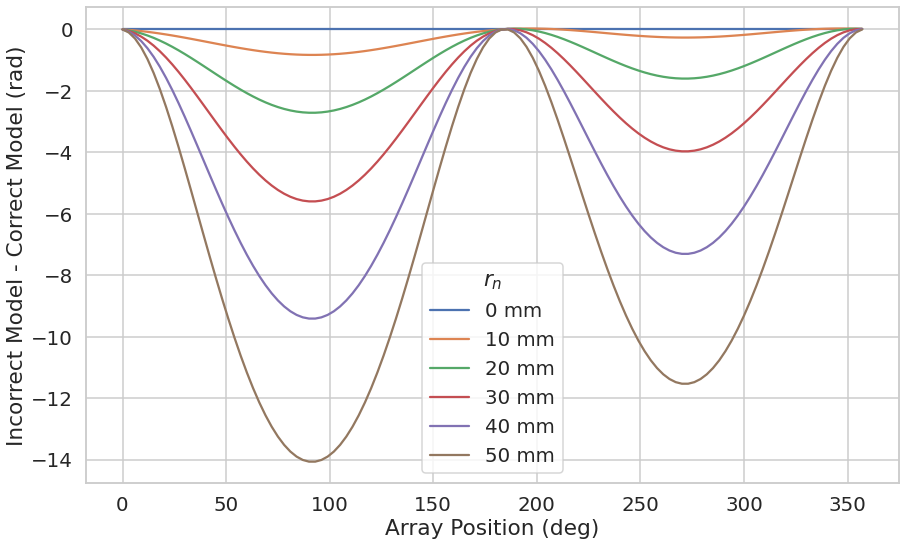

In [155]:
sns.set_theme(context='talk', style='whitegrid', font_scale=1.2)
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

for r in range(0, 55, 10):
    
    #ax.plot(np.arange(0, 120, 1) * 3, -synca_phase_model2(r, roll=60, n=n,)-synca_phase_model1(r, roll=0, n=n), label=f'{r} mm',)
     ax.plot(np.arange(0, 120, 1) * 3, -synca_phase_model3(r, roll=61, n=n,)-synca_phase_model1(r, roll=0, n=n), label=f'{r} mm',)
        
ax.legend(title=r'$r_n$', loc=8)

ax.set_xlabel('Array Position (deg)')
ax.set_ylabel('Incorrect Model - Correct Model (rad)')


plt.tight_layout(pad=1.02)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'221206_synca_phase_correct_wrong_model_differences', dpi=128)